In [1]:
#reads in relevant packages

import pandas as pd
import csv
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
from pandas.util.testing import assert_frame_equal
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from datetime import date
import statsmodels.api as sm

#reads XLS file into pandas dataframe
df_xls = pd.read_excel("Percent Complete Data.xlsx", sheetname='Data')


/Users/gavin/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#the matplot library doesn't by default display plots 'inline' within the notebook. They're otherwise created in-memory
#for saving to files or exporting to another viewer.
%matplotlib inline

In [3]:
#what's the top of the file look like. df_xls.tail() gives the end. df_xls.head(20) gives 20 rows
#df.sample(30) gives random sample of 30 rows. A lot of different ways to get a glimpse of the data
df_xls.head()

,Division,Region,District,Store,Fscl_Wk,Wk_End_Dt,Bay_Cnt_Flex_SLA,Pln_Bay_Cnt,pct_complete,Actual Hours,...,RE,Tasking Time,gbs_re_pct,proj_on_time_completion,proj_re_pct,bit_re_pct,prj_cmplt,prj_cmplt_lt,prj_ovrdue,OTC
0,SOUTHERN,SOUTHEAST,331,1854,201840,2018-11-04,345,341,1.012,293.75,...,85.219266,55.32,1.540478,0.964,0.961039,0.820203,28.0,1.0,0.0,0.964286
1,SOUTHERN,MIDSOUTH,234,1763,201819,2018-06-10,386,639,0.604,369.00,...,104.100116,142.83,0.728839,0.892,1.039216,1.140063,35.0,2.0,2.0,0.891892
2,NORTHERN,NORTHERN PLAINS,259,2204,201841,2018-11-11,391,433,0.903,482.00,...,121.442796,112.42,1.080260,0.929,1.022222,1.393512,41.0,2.0,1.0,0.928572
3,SOUTHERN,SOUTHWEST,111,507,201819,2018-06-10,476,596,0.799,342.75,...,182.313082,150.11,1.214530,1.000,0.961538,0.816431,48.0,0.0,0.0,1.000000
4,WESTERN,PACIFIC NORTH,209,6677,201841,2018-11-11,296,296,1.000,339.50,...,61.412809,69.95,0.877953,0.951,0.983607,1.378556,41.0,2.0,0.0,0.951220


In [4]:
#column headers
list(df_xls)

['Division',
 'Region',
 'District',
 'Store',
 'Fscl_Wk',
 'Wk_End_Dt',
 'Bay_Cnt_Flex_SLA',
 'Pln_Bay_Cnt',
 'pct_complete',
 'Actual Hours',
 'Planned Hours',
 'hours_v_plan',
 'Ttl_Tsk_Tm',
 'FW_Hrs',
 'pct_utilization',
 'RE',
 'Tasking Time',
 'gbs_re_pct',
 'proj_on_time_completion',
 'proj_re_pct',
 'bit_re_pct',
 'prj_cmplt',
 'prj_cmplt_lt',
 'prj_ovrdue',
 'OTC']

In [5]:
#simple statistical summary. Throws a warning because the NaN (not a number) values in some of the columns
df_xls.describe()

,District,Store,Fscl_Wk,Bay_Cnt_Flex_SLA,Pln_Bay_Cnt,pct_complete,Actual Hours,Planned Hours,hours_v_plan,Ttl_Tsk_Tm,...,RE,Tasking Time,gbs_re_pct,proj_on_time_completion,proj_re_pct,bit_re_pct,prj_cmplt,prj_cmplt_lt,prj_ovrdue,OTC
count,82452.000000,82452.000000,82452.000000,82452.000000,82452.000000,82452.000000,80360.000000,80360.000000,80360.000000,80473.000000,...,80473.000000,80473.000000,80473.000000,80471.000000,80439.000000,80471.000000,80473.000000,80473.000000,80473.000000,80471.000000
mean,159.267865,3366.764178,201823.637911,423.784347,481.252038,0.896097,370.053219,366.044594,0.015213,243.579881,...,132.265357,129.379141,1.035495,0.943995,1.092577,1.092087,30.111193,0.759982,0.825295,0.943981
std,99.179816,2483.314593,12.097218,200.870257,191.674167,0.237906,133.916370,129.931633,0.121332,66.811512,...,69.409279,65.883671,0.231977,0.086960,0.560640,0.348894,14.251159,1.785832,1.947762,0.086963
min,1.000000,105.000000,201801.000000,0.000000,1.000000,0.000000,-538.250000,184.874998,-1.756000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,1103.000000,201813.000000,311.000000,361.000000,0.836000,302.750000,303.906570,-0.057000,201.050000,...,83.580280,83.920000,0.918468,0.925000,0.921348,0.875055,20.000000,0.000000,0.000000,0.925000
50%,151.000000,2789.000000,201824.000000,420.000000,471.000000,1.000000,338.260000,329.364850,0.013000,234.980000,...,122.341946,121.240000,1.000000,0.971000,1.033333,1.049532,28.000000,0.000000,0.000000,0.971429
75%,244.000000,4930.000000,201834.000000,543.250000,592.000000,1.023000,387.000000,378.347324,0.084000,275.870000,...,167.614280,163.260000,1.134592,1.000000,1.184211,1.253645,39.000000,1.000000,1.000000,1.000000
max,338.000000,8998.000000,201844.000000,1496.000000,1497.000000,3.112000,1820.250000,1148.435669,1.792000,868.750000,...,806.476858,807.690000,15.127793,1.000000,46.753769,12.403098,121.000000,45.000000,50.000000,1.000000


In [6]:
#depending on screen size, slicing the dataframe gets more relevant columns into the window - want to see where the Nans are
df_xls.iloc[:, 8:].describe()

,pct_complete,Actual Hours,Planned Hours,hours_v_plan,Ttl_Tsk_Tm,FW_Hrs,pct_utilization,RE,Tasking Time,gbs_re_pct,proj_on_time_completion,proj_re_pct,bit_re_pct,prj_cmplt,prj_cmplt_lt,prj_ovrdue,OTC
count,82452.000000,80360.000000,80360.000000,80360.000000,80473.000000,80473.000000,80473.000000,80473.000000,80473.000000,80473.000000,80471.000000,80439.000000,80471.000000,80473.000000,80473.000000,80473.000000,80471.000000
mean,0.896097,370.053219,366.044594,0.015213,243.579881,286.423021,0.853426,132.265357,129.379141,1.035495,0.943995,1.092577,1.092087,30.111193,0.759982,0.825295,0.943981
std,0.237906,133.916370,129.931633,0.121332,66.811512,76.653663,0.102779,69.409279,65.883671,0.231977,0.086960,0.560640,0.348894,14.251159,1.785832,1.947762,0.086963
min,0.000000,-538.250000,184.874998,-1.756000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.836000,302.750000,303.906570,-0.057000,201.050000,238.750000,0.798000,83.580280,83.920000,0.918468,0.925000,0.921348,0.875055,20.000000,0.000000,0.000000,0.925000
50%,1.000000,338.260000,329.364850,0.013000,234.980000,274.500000,0.862000,122.341946,121.240000,1.000000,0.971000,1.033333,1.049532,28.000000,0.000000,0.000000,0.971429
75%,1.023000,387.000000,378.347324,0.084000,275.870000,319.750000,0.919000,167.614280,163.260000,1.134592,1.000000,1.184211,1.253645,39.000000,1.000000,1.000000,1.000000
max,3.112000,1820.250000,1148.435669,1.792000,868.750000,1013.000000,1.000000,806.476858,807.690000,15.127793,1.000000,46.753769,12.403098,121.000000,45.000000,50.000000,1.000000


In [7]:
#want to compare 2 dataframes, one where "Actual hours" is null, and another where it's not
df_notnull = df_xls[df_xls["Actual Hours"].notnull()]
df_null = df_xls[df_xls["Actual Hours"].isnull()]

In [8]:
df_notnull[df_notnull["proj_on_time_completion"].isnull()]

,Division,Region,District,Store,Fscl_Wk,Wk_End_Dt,Bay_Cnt_Flex_SLA,Pln_Bay_Cnt,pct_complete,Actual Hours,...,RE,Tasking Time,gbs_re_pct,proj_on_time_completion,proj_re_pct,bit_re_pct,prj_cmplt,prj_cmplt_lt,prj_ovrdue,OTC
41073,SOUTHERN,MIDSOUTH,319,884,201802,2018-02-11,1,1,1.000,332.25,...,2.546313,11.07,0.230019,NaN,NaN,1.131990,0.0,0.0,0.0,NaN
61707,NORTHERN,MIDWEST,275,2754,201805,2018-03-04,221,252,0.877,226.00,...,65.131601,55.43,1.175024,NaN,NaN,1.411315,0.0,0.0,0.0,NaN


In [9]:
#data seems to be sliced along an "actual hours planned" (and related fields) as null, and "proj_on_time_completion"
#as null and there's a little bit of overlap
df_null.describe()

,District,Store,Fscl_Wk,Bay_Cnt_Flex_SLA,Pln_Bay_Cnt,pct_complete,Actual Hours,Planned Hours,hours_v_plan,Ttl_Tsk_Tm,...,RE,Tasking Time,gbs_re_pct,proj_on_time_completion,proj_re_pct,bit_re_pct,prj_cmplt,prj_cmplt_lt,prj_ovrdue,OTC
count,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,0.0,0.0,0.0,113.000000,...,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,160.683556,3383.097514,201842.383843,20.321702,579.000478,0.045304,NaN,NaN,NaN,176.392655,...,115.304740,119.317699,0.972482,0.898717,1.169710,1.084461,26.442478,1.274336,1.575221,0.898710
std,98.482723,2444.938580,6.998899,94.490125,172.279795,0.197305,NaN,NaN,NaN,95.239325,...,55.826582,54.197551,0.199012,0.127259,0.336740,0.301590,14.885838,2.172259,3.461021,0.127244
min,1.000000,105.000000,201801.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,0.000000,...,23.310000,23.310000,0.506835,0.481000,0.615385,0.448195,6.000000,0.000000,0.000000,0.481482
25%,74.750000,1216.750000,201844.000000,0.000000,460.000000,0.000000,NaN,NaN,NaN,159.770000,...,73.540000,73.790000,0.835070,0.833000,0.965517,0.881798,17.000000,0.000000,0.000000,0.833334
50%,153.000000,2809.000000,201844.000000,0.000000,559.000000,0.000000,NaN,NaN,NaN,195.070000,...,101.080000,121.440000,0.974362,0.947000,1.120301,1.040560,24.000000,1.000000,0.000000,0.947369
75%,245.000000,4921.500000,201844.000000,0.000000,670.000000,0.000000,NaN,NaN,NaN,232.610000,...,155.141901,149.860000,1.069482,1.000000,1.275000,1.241167,31.000000,1.000000,2.000000,1.000000
max,338.000000,8998.000000,201844.000000,781.000000,1281.000000,1.311000,NaN,NaN,NaN,378.150000,...,286.665365,330.240000,1.649022,1.000000,3.000000,2.089998,89.000000,11.000000,27.000000,1.000000


In [10]:
#Just getting the levels of the categorical
df_xls["Division"].unique()

array(['SOUTHERN', 'NORTHERN', 'WESTERN'], dtype=object)

In [11]:
df_null["Region"].unique()

array(['NJ METRO', 'NEW ENGLAND', 'OHIO VALLEY', 'PACIFIC NORTH',
       'PACIFIC NORTHWEST', 'MIDSOUTH', 'SOUTHWEST', 'NORTHERN PLAINS',
       'PACIFIC SOUTH', 'PACIFIC CENTRAL', 'MIDWEST', 'SOUTH ATLANTIC',
       'GULF', 'SOUTHEAST', 'CENTRAL', 'PAC MTN DESERT', 'MID-ATLANTIC',
       'NY METRO', 'SOUTH FLORIDA/PR'], dtype=object)

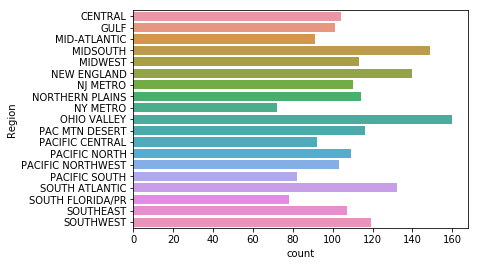

In [12]:
sns.countplot(y="Region", data=df_null, order=sorted(df_null["Region"].unique()))

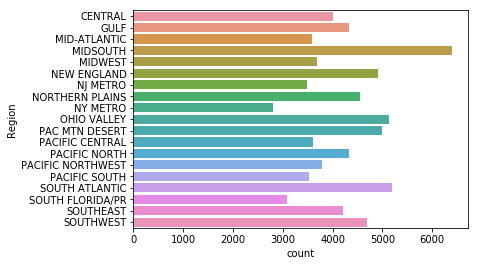

In [13]:
sns.countplot(y="Region", data=df_notnull, order=sorted(df_null["Region"].unique()))

In [14]:
df_null["Region"].nunique()

19

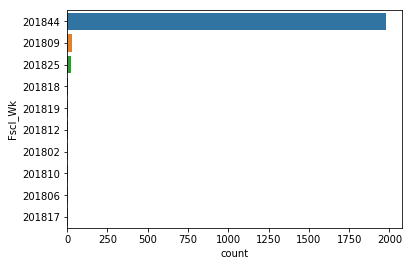

In [15]:
#top 10 fisc wks with null entries - week 44 is an anomaly
sns.countplot(y="Fscl_Wk", data=df_null, order = df_null.Fscl_Wk.value_counts().iloc[:10].index)

In [16]:
#looking at fscl wk, the first 4 weeks are different
df_xls.groupby('Fscl_Wk').count()

,Division,Region,District,Store,Wk_End_Dt,Bay_Cnt_Flex_SLA,Pln_Bay_Cnt,pct_complete,Actual Hours,Planned Hours,...,RE,Tasking Time,gbs_re_pct,proj_on_time_completion,proj_re_pct,bit_re_pct,prj_cmplt,prj_cmplt_lt,prj_ovrdue,OTC
Fscl_Wk,,,,,,,,,,,,,,,,,,,,,
201801,811,811,811,811,811,811,811,811,809,809,...,811,811,811,811,811,811,811,811,811,811
201802,811,811,811,811,811,811,811,811,806,806,...,811,811,811,810,809,811,811,811,811,810
201803,811,811,811,811,811,811,811,811,810,810,...,811,811,811,811,809,811,811,811,811,811
201804,811,811,811,811,811,811,811,811,811,811,...,811,811,811,811,807,811,811,811,811,811
201805,1979,1979,1979,1979,1979,1979,1979,1979,1976,1976,...,1979,1979,1979,1978,1976,1979,1979,1979,1979,1978
201806,1979,1979,1979,1979,1979,1979,1979,1979,1976,1976,...,1979,1979,1979,1979,1979,1979,1979,1979,1979,1979
201807,1979,1979,1979,1979,1979,1979,1979,1979,1976,1976,...,1979,1979,1979,1979,1978,1979,1979,1979,1979,1979
201808,1979,1979,1979,1979,1979,1979,1979,1979,1977,1977,...,1979,1979,1979,1979,1979,1978,1979,1979,1979,1979
201809,1979,1979,1979,1979,1979,1979,1979,1979,1948,1948,...,1979,1979,1979,1979,1978,1979,1979,1979,1979,1979


In [17]:
df_notnull.groupby(["Division","Region"]).agg({'pct_complete': ['mean']})

pct_complete
                                   mean
Division Region                        
NORTHERN CENTRAL               0.930395
         MID-ATLANTIC          0.855714
         MIDWEST               0.886844
         NEW ENGLAND           0.872876
         NJ METRO              0.903371
         NORTHERN PLAINS       0.918984
         NY METRO              0.892651
         OHIO VALLEY           0.933010
SOUTHERN GULF                  0.959952
         MIDSOUTH              0.917657
         SOUTH ATLANTIC        0.922106
         SOUTH FLORIDA/PR      0.929209
         SOUTHEAST             0.931091
         SOUTHWEST             0.944317
WESTERN  PAC MTN DESERT        0.905033
         PACIFIC CENTRAL       0.962011
         PACIFIC NORTH         0.875646
         PACIFIC NORTHWEST     0.925987
         PACIFIC SOUTH         0.979318

In [18]:
print ("Mean of Null DF :", df_null['pct_complete'].mean())
print ("Mean of NotNull DF :", df_notnull['pct_complete'].mean())
ttest_ind(df_null['pct_complete'], df_notnull['pct_complete'])

#two very different populations

Mean of Null DF : 0.04530449330783939
Mean of NotNull DF : 0.918245980587377


Ttest_indResult(statistic=-202.85882253750944, pvalue=0.0)

In [19]:
#going ahead and dropping all rows without data
df = df_xls.dropna()

In [20]:
#are the weeks 01-04 statistically different wrt pct complete than the rest of the data set?
#turns out they are with p-value close to 0
#Also turns out this isn't a great way to test this data set because each week is statististically different
#than most others

ttest_ind(df[df["Fscl_Wk"].isin([201801, 201802, 201803, 201804])]['pct_complete'], df[df["Fscl_Wk"].isin([201801, 201802, 201803, 201804]) == False]['pct_complete'])

Ttest_indResult(statistic=24.498003067743568, pvalue=4.750913990757624e-132)

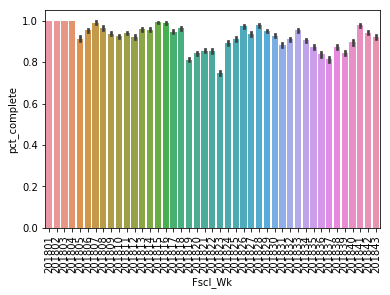

In [21]:
#Plot pct complete by fsk weeks (rotate labels)
#wks 1-4 look like outliers
by_wk = sns.barplot(x ='Fscl_Wk',y='pct_complete', data=df)
for item in by_wk.get_xticklabels():
    item.set_rotation(90)
    
by_wk

In [22]:
#confirms that pct_complete has 0 variation for weeks 1-4
df[df["Fscl_Wk"].isin([201801, 201802, 201803, 201804])].describe()

,District,Store,Fscl_Wk,Bay_Cnt_Flex_SLA,Pln_Bay_Cnt,pct_complete,Actual Hours,Planned Hours,hours_v_plan,Ttl_Tsk_Tm,...,RE,Tasking Time,gbs_re_pct,proj_on_time_completion,proj_re_pct,bit_re_pct,prj_cmplt,prj_cmplt_lt,prj_ovrdue,OTC
count,3228.000000,3228.000000,3228.000000,3228.0,3228.0,3228.0,3228.000000,3228.000000,3228.000000,3228.000000,...,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000
mean,157.118959,3157.911400,201802.499690,1.0,1.0,1.0,360.365905,352.715363,0.034206,227.710524,...,116.836229,117.878776,1.016940,0.976621,1.105709,0.955830,33.550805,0.376084,0.427819,0.976610
std,98.162044,2559.943557,1.118761,0.0,0.0,0.0,117.404593,120.737465,0.157575,60.296495,...,62.854091,60.054625,0.307168,0.072221,0.331749,0.317781,18.110057,1.871072,2.284681,0.072227
min,1.000000,105.000000,201801.000000,1.0,1.0,1.0,-133.500000,184.874998,-1.434000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.282282,0.272733,1.000000,0.000000,0.000000,0.000000
25%,73.000000,803.750000,201801.000000,1.0,1.0,1.0,300.250000,301.309870,-0.067000,190.540000,...,78.005348,78.797500,0.838650,0.986000,0.942196,0.740303,20.000000,0.000000,0.000000,0.985508
50%,162.000000,2653.000000,201803.000000,1.0,1.0,1.0,335.125000,320.122198,0.026000,219.250000,...,113.289672,112.740000,0.984991,1.000000,1.053122,0.914787,31.000000,0.000000,0.000000,1.000000
75%,238.000000,6001.000000,201803.250000,1.0,1.0,1.0,385.500000,356.294886,0.122000,253.565000,...,138.739326,145.257500,1.154039,1.000000,1.200000,1.131340,44.000000,0.000000,0.000000,1.000000
max,338.000000,8995.000000,201804.000000,1.0,1.0,1.0,1140.000000,1060.492767,1.792000,647.410000,...,446.813714,459.650000,6.148077,1.000000,6.000000,4.465703,121.000000,37.000000,45.000000,1.000000


In [23]:
#summary of the remainder of the weeks (5-43) - looks good.
df[df["Fscl_Wk"].isin([201801, 201802, 201803, 201804]) == False].describe()

,District,Store,Fscl_Wk,Bay_Cnt_Flex_SLA,Pln_Bay_Cnt,pct_complete,Actual Hours,Planned Hours,hours_v_plan,Ttl_Tsk_Tm,...,RE,Tasking Time,gbs_re_pct,proj_on_time_completion,proj_re_pct,bit_re_pct,prj_cmplt,prj_cmplt_lt,prj_ovrdue,OTC
count,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,...,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000
mean,159.301754,3375.123262,201824.015370,452.505292,498.775228,0.914865,370.486640,366.627288,0.014424,244.365791,...,132.960231,129.899469,1.036366,0.942833,1.091851,1.097784,29.985538,0.775578,0.840044,0.942818
std,99.245975,2480.907981,11.253398,173.635780,168.016943,0.197444,134.570566,130.293559,0.119509,66.880396,...,69.607717,66.083191,0.228280,0.086622,0.568195,0.349041,14.037340,1.779997,1.920785,0.086625
min,1.000000,105.000000,201805.000000,0.000000,1.000000,0.000000,-538.250000,196.409565,-1.756000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,73.000000,1108.000000,201814.000000,332.000000,372.000000,0.847000,302.750000,304.038142,-0.056000,201.670000,...,83.833745,84.180000,0.921934,0.923000,0.920354,0.881602,20.000000,0.000000,0.000000,0.923077
50%,151.000000,2803.000000,201824.000000,435.000000,477.000000,0.999000,338.500000,329.966814,0.013000,235.730000,...,122.960341,121.640000,1.000000,0.971000,1.032609,1.054374,28.000000,0.000000,0.000000,0.970589
75%,244.000000,4929.000000,201834.000000,553.000000,596.000000,1.025000,387.000000,378.695445,0.083000,276.692500,...,168.775596,164.040000,1.133799,1.000000,1.183099,1.257936,39.000000,1.000000,1.000000,1.000000
max,338.000000,8998.000000,201843.000000,1496.000000,1497.000000,3.112000,1820.250000,1148.435669,1.558000,868.750000,...,806.476858,807.690000,15.127793,1.000000,46.753769,12.403098,109.000000,45.000000,50.000000,1.000000


In [ ]:
#remove weeks 1-4 because they don't add anythnig to the percent complete data
df = df[df['Fscl_Wk'].isin([201801, 201802, 201803, 201804]) == False]

(array([  3.34000000e+02,   8.87000000e+02,   2.23200000e+03,
          4.21200000e+03,   7.13400000e+03,   1.15560000e+04,
          4.97880000e+04,   3.51500000e+03,   4.76000000e+02,
          1.49000000e+02,   4.30000000e+01,   2.40000000e+01,
          4.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([ 0.    ,  0.1556,  0.3112,  0.4668,  0.6224,  0.778 ,  0.9336,
         1.0892,  1.2448,  1.4004,  1.556 ,  1.7116,  1.8672,  2.0228,
         2.1784,  2.334 ,  2.4896,  2.6452,  2.8008,  2.9564,  3.112 ]),
 <a list of 20 Patch objects>)

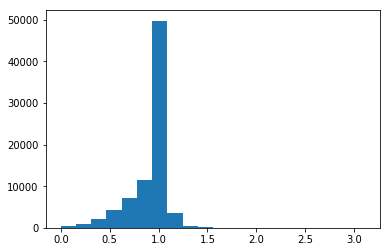

In [24]:
plt.hist(df_notnull["pct_complete"], bins = 20)

/Users/gavin/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


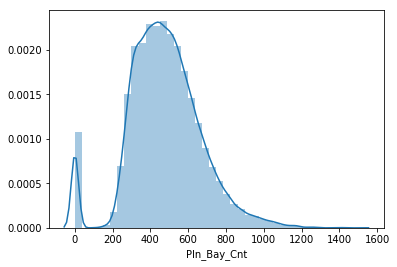

In [43]:
#Threw a few different columns in here to just dest distribution of data
sns.distplot(df_notnull["Pln_Bay_Cnt"], bins = 40)


In [26]:
df_AH_null = df_xls[df_xls["Actual Hours"].isnull()]

In [27]:
df_notnull.describe()

,District,Store,Fscl_Wk,Bay_Cnt_Flex_SLA,Pln_Bay_Cnt,pct_complete,Actual Hours,Planned Hours,hours_v_plan,Ttl_Tsk_Tm,...,RE,Tasking Time,gbs_re_pct,proj_on_time_completion,proj_re_pct,bit_re_pct,prj_cmplt,prj_cmplt_lt,prj_ovrdue,OTC
count,80360.000000,80360.000000,80360.000000,80360.000000,80360.000000,80360.000000,80360.000000,80360.000000,80360.000000,80360.000000,...,80360.000000,80360.000000,80360.000000,80358.000000,80326.000000,80358.000000,80360.000000,80360.000000,80360.000000,80358.000000
mean,159.231010,3366.338975,201823.149900,434.287631,478.707367,0.918246,370.053219,366.044594,0.015213,243.674358,...,132.289206,129.393289,1.035584,0.944059,1.092469,1.092098,30.116351,0.759258,0.824241,0.944045
std,99.198237,2484.319263,11.810646,191.882491,191.488639,0.194230,133.916370,129.931633,0.121332,66.716238,...,69.423870,65.897840,0.232009,0.086875,0.560886,0.348957,14.249678,1.785142,1.944640,0.086878
min,1.000000,105.000000,201801.000000,0.000000,1.000000,0.000000,-538.250000,184.874998,-1.756000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,1092.000000,201813.000000,319.000000,358.000000,0.858000,302.750000,303.906570,-0.057000,201.107500,...,83.599729,83.940000,0.918618,0.925000,0.921260,0.875020,20.000000,0.000000,0.000000,0.925000
50%,151.000000,2789.000000,201823.000000,426.000000,468.000000,1.000000,338.260000,329.364850,0.013000,235.010000,...,122.354134,121.235000,1.000000,0.971000,1.033333,1.049557,28.000000,0.000000,0.000000,0.971429
75%,244.000000,4930.000000,201833.000000,547.000000,589.000000,1.024000,387.000000,378.347324,0.084000,275.920000,...,167.641523,163.290000,1.134654,1.000000,1.184178,1.253664,39.000000,1.000000,1.000000,1.000000
max,338.000000,8998.000000,201843.000000,1496.000000,1497.000000,3.112000,1820.250000,1148.435669,1.792000,868.750000,...,806.476858,807.690000,15.127793,1.000000,46.753769,12.403098,121.000000,45.000000,50.000000,1.000000


In [50]:
# Change the categorical columns to strings - statistical summaries of them are irrelevant as numbers

df['District'] = df['District'].astype(str)
df['Fscl_Wk'] = df['Fscl_Wk'].astype(str)
df['Store'] = df['Store'].astype(str)

In [54]:
#Add columns relevant to the RE
df["RE_Deviation"] = abs(df["RE"] - 100)
df["RE_Dev_Dir"] = df["RE"].apply(lambda x: -1 if x < 100 else (0 if x == 100 else 1))
df[["RE", "RE_Deviation", "RE_Dev_Dir"]].head(20)

In [76]:
#Correct the negative 'actual hours' that are in the df. Could probably just drop them but it's reasonable to
#think they should be positive based on other values in the df.
df["Actual Hours"] = abs(df["Actual Hours"])
plt.hist(df['Actual Hours'], bins = 40)

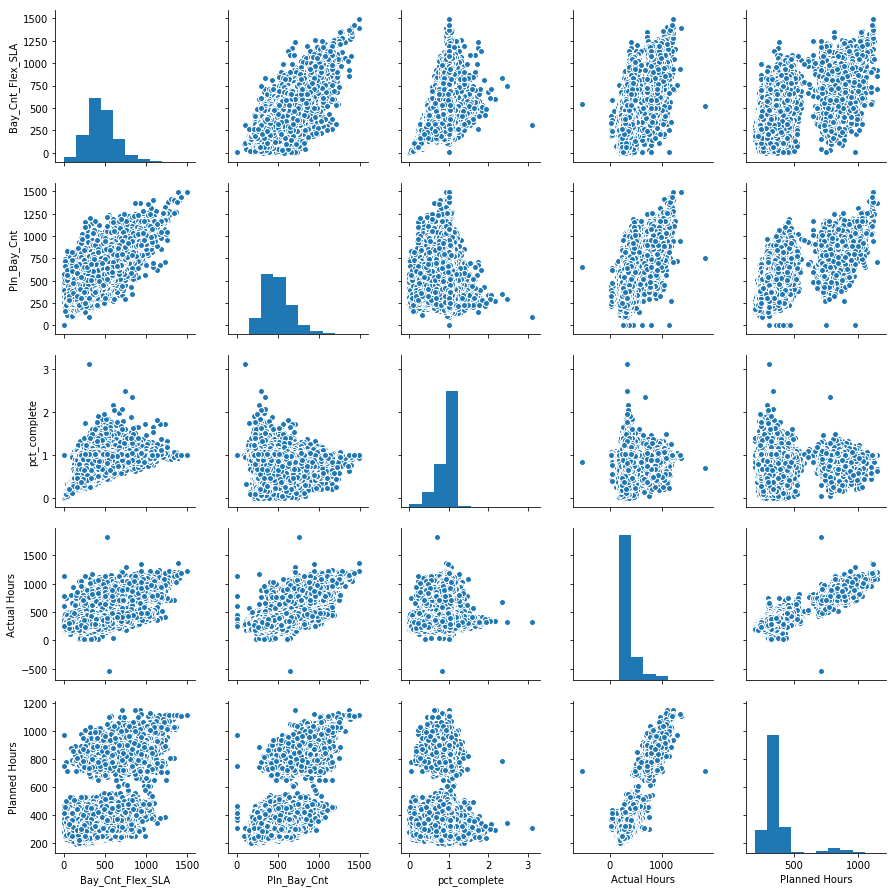

In [60]:
sns.pairplot(df.iloc[:,6:11])

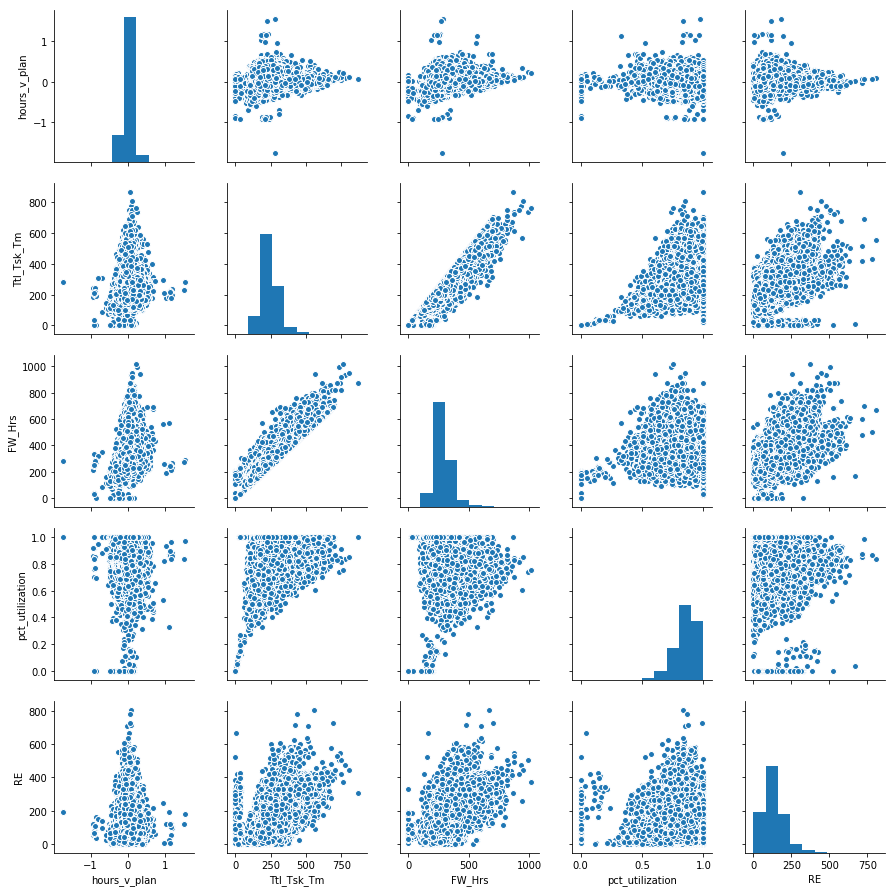

In [62]:
sns.pairplot(df.iloc[:,11:16])

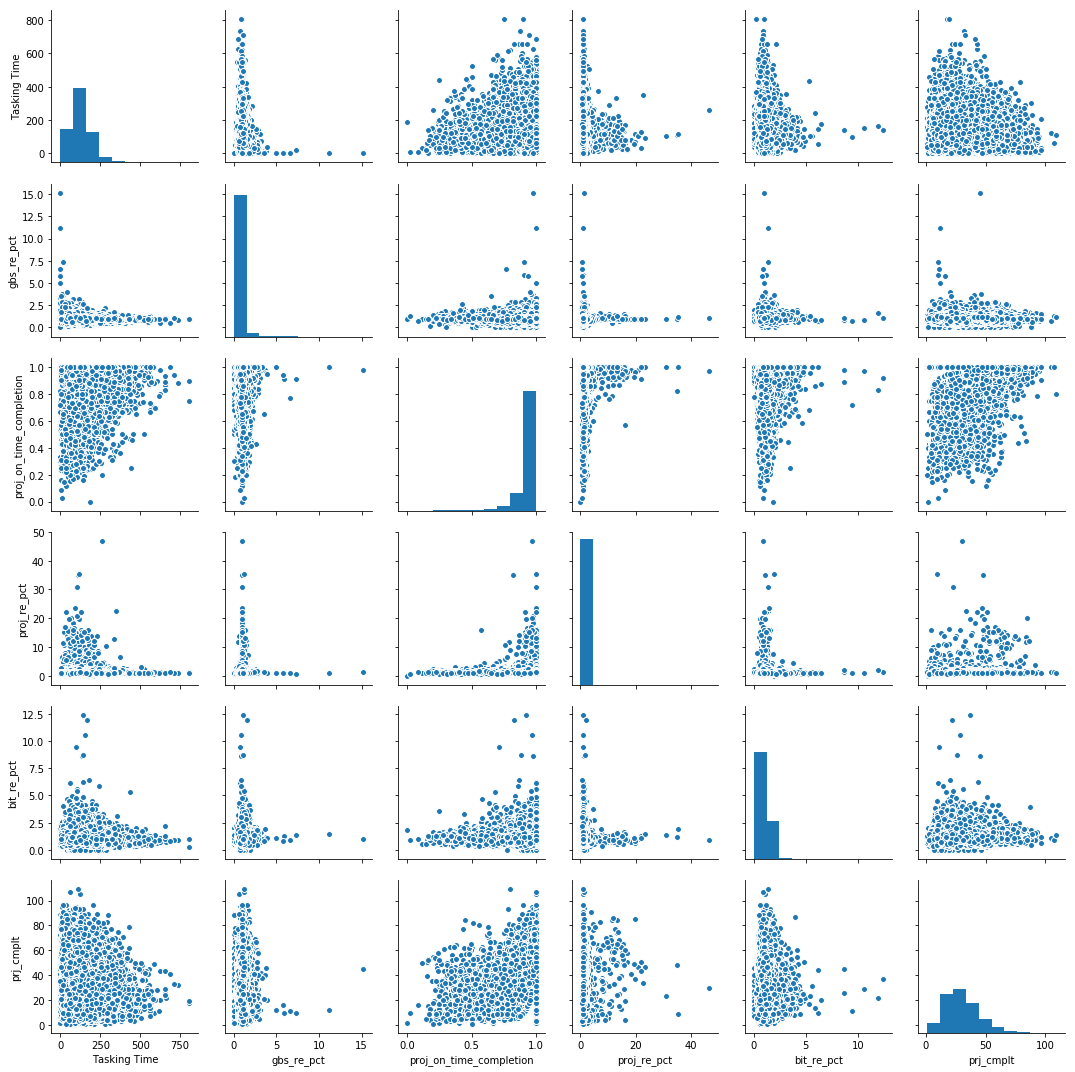

In [71]:
sns.pairplot(df.iloc[:,16:22])

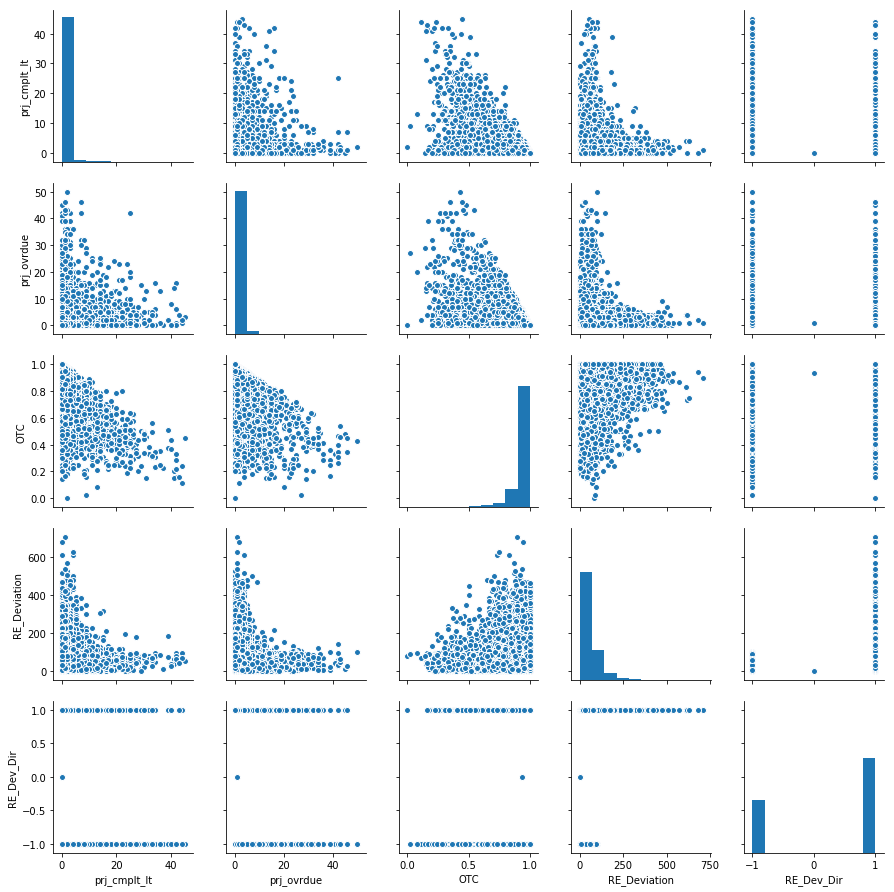

In [72]:
sns.pairplot(df.iloc[:,22:])

In [ ]:
#Using pct_complete as the y-var, checking if there are significant differences between Divisions and Regions

In [73]:
div_dummies = pd.get_dummies(df['Division'])
region_dummies = pd.get_dummies(df['Region'])
dist_dummies = pd.get_dummies(df['District'])

In [74]:
print("Baseline = ",list(div_dummies)[0])
X = div_dummies.iloc[:,1:]
X = sm.add_constant(X)
y = df['pct_complete']
model = sm.OLS(y, X).fit()
model.summary()

Baseline =  NORTHERN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pct_complete   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     215.0
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           7.38e-94
Time:                        15:10:02   Log-Likelihood:                 15894.
No. Observations:               77096   AIC:                        -3.178e+04
Df Residuals:                   77093   BIC:                        -3.175e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8973      0.001    802.953      0.000       0.895       0.899
SOUTHERN       0.0326      0.002     19.842      0.000       0.029       0.036
WESTERN        0.0250      0.002     13.829      0.000       0.021       0.028
==============================================================================
Omnibus:                    20449.520   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57006.238
Skew:                          -1.409   Prob(JB):                         0.00
Kurtosis:                       6.131   Cond. No.                         3.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print("Baseline = ", list(region_dummies)[0])
X = region_dummies.iloc[:,1:]
X = sm.add_constant(X)
y = df['pct_complete']
model = sm.OLS(y, X).fit()
model.summary()

Baseline =  CENTRAL


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pct_complete   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     111.5
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:59:36   Log-Likelihood:                 16670.
No. Observations:               77096   AIC:                        -3.330e+04
Df Residuals:                   77077   BIC:                        -3.313e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.9298      0.003    300.716      0.000       0.924       0.936
GULF                  0.0261      0.004      5.942      0.000       0.017       0.035
MID-ATLANTIC         -0.0759      0.005    -16.853      0.000      -0.085      -0.067
MIDSOUTH             -0.0204      0.004     -5.086      0.000      -0.028      -0.013
MIDWEST              -0.0443      0.004     -9.908      0.000      -0.053      -0.036
NEW ENGLAND          -0.0701      0.004    -16.477      0.000      -0.078      -0.062
NJ METRO             -0.0277      0.005     -6.099      0.000      -0.037      -0.019
NORTHERN PLAINS      -0.0184      0.004     -4.256      0.000      -0.027      -0.010
NY METRO             -0.0389      0.005     -8.051      0.000      -0.048      -0.029
OHIO VALLEY           0.0025      0.004      0.595      0.552      -0.006       0.011
PAC MTN DESERT       -0.0345      0.004     -8.133      0.000      -0.043      -0.026
PACIFIC CENTRAL       0.0318      0.004      7.066      0.000       0.023       0.041
PACIFIC NORTH        -0.0555      0.004    -12.921      0.000      -0.064      -0.047
PACIFIC NORTHWEST    -0.0046      0.004     -1.043      0.297      -0.013       0.004
PACIFIC SOUTH         0.0474      0.005     10.227      0.000       0.038       0.056
SOUTH ATLANTIC       -0.0085      0.004     -2.072      0.038      -0.017      -0.000
SOUTH FLORIDA/PR     -0.0015      0.005     -0.310      0.757      -0.011       0.008
SOUTHEAST             0.0005      0.004      0.117      0.907      -0.008       0.009
SOUTHWEST             0.0139      0.004      3.291      0.001       0.006       0.022
==============================================================================
Omnibus:                    19758.916   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54660.568
Skew:                          -1.364   Prob(JB):                         0.00
Kurtosis:                       6.094   Cond. No.                         20.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X = df[['Pln_Bay_Cnt', 'Tasking Time']]
X = sm.add_constant(X)
y = df['pct_complete']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pct_complete   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                 1.062e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:59:36   Log-Likelihood:                 25059.
No. Observations:               77096   AIC:                        -5.011e+04
Df Residuals:                   77093   BIC:                        -5.008e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0130      0.002    510.468      0.000       1.009       1.017
Pln_Bay_Cnt     -0.0007   5.58e-06   -128.780      0.000      -0.001      -0.001
Tasking Time     0.0020   1.42e-05    141.216      0.000       0.002       0.002
==============================================================================
Omnibus:                    12944.619   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27291.532
Skew:                          -1.002   Prob(JB):                         0.00
Kurtosis:                       5.116   Cond. No.                     1.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X = df[]
X = sm.add_constant(X)
y = df['pct_complete']
model = sm.OLS(y, X).fit()
model.summary()

In [97]:
x_predictors = df.iloc[:,6:].drop(labels = ["pct_complete"], axis = 1)
x_predictors = sm.add_constant(x_predictors)
y = df['pct_complete']
model = sm.OLS(y, x_predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pct_complete   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 4.268e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:57:22   Log-Likelihood:             1.1170e+05
No. Observations:               77096   AIC:                        -2.234e+05
Df Residuals:                   77075   BIC:                        -2.232e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.7795      0.007    107.152      0.000       0.765       0.794
Bay_Cnt_Flex_SLA            0.0019   2.84e-06    662.255      0.000       0.002       0.002
Pln_Bay_Cnt                -0.0017   2.51e-06   -666.407      0.000      -0.002      -0.002
Actual Hours               -0.0004   1.52e-05    -26.678      0.000      -0.000      -0.000
Planned Hours               0.0005   1.53e-05     30.740      0.000       0.000       0.000
hours_v_plan                0.1605      0.006     29.016      0.000       0.150       0.171
Ttl_Tsk_Tm                 -0.0003   2.17e-05    -15.882      0.000      -0.000      -0.000
FW_Hrs                      0.0003   1.83e-05     13.797      0.000       0.000       0.000
pct_utilization             0.0715      0.006     11.509      0.000       0.059       0.084
RE                          0.0002   1.73e-05     13.075      0.000       0.000       0.000
Tasking Time                0.0003   1.49e-05     17.882      0.000       0.000       0.000
gbs_re_pct                  0.0122      0.002      7.690      0.000       0.009       0.015
proj_on_time_completion    -0.3286      0.903     -0.364      0.716      -2.098       1.440
proj_re_pct                 0.0002      0.000      0.681      0.496      -0.000       0.001
bit_re_pct                 -0.0021      0.001     -3.497      0.000      -0.003      -0.001
prj_cmplt                   0.0002   1.72e-05     10.009      0.000       0.000       0.000
prj_cmplt_lt                0.0008      0.000      4.705      0.000       0.000       0.001
prj_ovrdue                  0.0003      0.000      1.587      0.112   -5.91e-05       0.001
OTC                         0.3473      0.903      0.385      0.700      -1.422       2.116
RE_Deviation               -0.0009   8.07e-06   -114.371      0.000      -0.001      -0.001
RE_Dev_Dir                 -0.0070      0.000    -19.707      0.000      -0.008      -0.006
==============================================================================
Omnibus:                    31587.568   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1641270.703
Skew:                           1.206   Prob(JB):                         0.00
Kurtosis:                      25.475   Cond. No.                     6.20e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
columns_not_normalized = ['Division', 'Region', 'District', 'Store', 'Fscl_Wk', 'Wk_End_Dt']
columns_to_be_normalized = list(set(list(df)) - set(columns_to_be_normalized))
columns_to_be_normalized

['RE_Deviation',
 'Bay_Cnt_Flex_SLA',
 'prj_cmplt_lt',
 'Planned Hours',
 'prj_cmplt',
 'Actual Hours',
 'Tasking Time',
 'FW_Hrs',
 'Ttl_Tsk_Tm',
 'Pln_Bay_Cnt']

In [108]:
df_n = df
for column in columns_to_be_normalized:
    df_n[column] = (df[column] - df[column].mean())/df[column].std()

df_n = df_n.drop(labels = "RE", axis = 1)
df_n

,Division,Region,District,Store,Fscl_Wk,Wk_End_Dt,Bay_Cnt_Flex_SLA,Pln_Bay_Cnt,pct_complete,Actual Hours,...,gbs_re_pct,proj_on_time_completion,proj_re_pct,bit_re_pct,prj_cmplt,prj_cmplt_lt,prj_ovrdue,OTC,RE_Deviation,RE_Dev_Dir
0,SOUTHERN,SOUTHEAST,331,1854,201840,2018-11-04,-0.619143,-0.939044,1.012,-0.570500,...,1.540478,0.964,0.961039,0.820203,-0.141447,0.126080,0.0,0.964286,-0.770048,-1
1,SOUTHERN,MIDSOUTH,234,1763,201819,2018-06-10,-0.383016,0.834587,0.604,-0.011154,...,0.728839,0.892,1.039216,1.140063,0.357223,0.687878,2.0,0.891892,-0.970938,1
2,NORTHERN,NORTHERN PLAINS,259,2204,201841,2018-11-11,-0.354220,-0.391480,0.903,0.828794,...,1.080260,0.929,1.022222,1.393512,0.784655,0.687878,1.0,0.928572,-0.644743,1
3,SOUTHERN,SOUTHWEST,111,507,201819,2018-06-10,0.135310,0.578661,0.799,-0.206275,...,1.214530,1.000,0.961538,0.816431,1.283325,-0.435719,0.0,1.000000,0.500154,1
4,WESTERN,PACIFIC NORTH,209,6677,201841,2018-11-11,-0.901342,-1.206874,1.000,-0.230433,...,0.877953,0.951,0.983607,1.378556,0.784655,0.687878,0.0,0.951220,-0.322278,-1
5,SOUTHERN,SOUTHEAST,133,802,201831,2018-09-02,-0.884065,-1.183067,0.997,-0.472011,...,0.818456,0.920,0.907801,0.713715,-0.426401,0.126080,1.0,0.920000,-0.672573,-1
6,NORTHERN,OHIO VALLEY,75,4129,201809,2018-04-01,0.123792,0.870298,0.735,-0.022304,...,0.901835,0.538,1.059524,1.443594,0.642177,9.676656,0.0,0.538462,-0.548258,1
7,SOUTHERN,SOUTH FLORIDA/PR,281,6408,201820,2018-06-17,1.235314,0.709600,1.079,0.351213,...,0.857073,0.963,1.200000,1.565327,-0.212685,0.126080,0.0,0.962963,1.036064,1
8,WESTERN,PAC MTN DESERT,18,452,201830,2018-08-26,-1.010767,0.048952,0.546,-0.970033,...,0.878146,0.966,1.000000,0.922099,-0.141447,-0.435719,1.0,0.965518,-0.616366,-1
9,NORTHERN,CENTRAL,98,1967,201810,2018-04-08,-0.158408,-0.427190,0.995,-1.023924,...,1.626690,0.957,1.242424,2.381524,-0.568878,-0.435719,1.0,0.956522,-0.912377,-1


In [105]:
df["Bay_Cnt_Flex_SLA"].mean()

452.5052921033517

In [123]:
x_predictors = df_n.iloc[:,6:].drop(labels = ["pct_complete", "Actual Hours"], axis = 1)
x_predictors = sm.add_constant(x_predictors)
y = df['pct_complete']
model = sm.OLS(y, x_predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pct_complete   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 4.679e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:59:01   Log-Likelihood:             1.1123e+05
No. Observations:               77096   AIC:                        -2.224e+05
Df Residuals:                   77077   BIC:                        -2.223e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.8210      0.007    112.877      0.000       0.807       0.835
Bay_Cnt_Flex_SLA            0.3288      0.000    699.828      0.000       0.328       0.330
Pln_Bay_Cnt                -0.2809      0.000   -665.865      0.000      -0.282      -0.280
Planned Hours               0.0090      0.000     24.976      0.000       0.008       0.010
hours_v_plan                0.0227      0.002     10.771      0.000       0.019       0.027
Ttl_Tsk_Tm                 -0.0208      0.001    -14.357      0.000      -0.024      -0.018
FW_Hrs                      0.0156      0.001     11.161      0.000       0.013       0.018
pct_utilization             0.0623      0.006     10.011      0.000       0.050       0.074
Tasking Time                0.0280      0.001     54.194      0.000       0.027       0.029
gbs_re_pct                  0.0264      0.001     23.287      0.000       0.024       0.029
proj_on_time_completion    -0.4361      0.908     -0.480      0.631      -2.216       1.344
proj_re_pct              6.662e-05      0.000      0.183      0.855      -0.001       0.001
bit_re_pct                 -0.0024      0.001     -4.023      0.000      -0.004      -0.001
prj_cmplt                   0.0023      0.000      9.580      0.000       0.002       0.003
prj_cmplt_lt                0.0014      0.000      4.387      0.000       0.001       0.002
prj_ovrdue                  0.0001      0.000      0.874      0.382      -0.000       0.000
OTC                         0.4541      0.908      0.500      0.617      -1.326       2.234
RE_Deviation               -0.0466      0.000   -123.473      0.000      -0.047      -0.046
RE_Dev_Dir                 -0.0056      0.000    -16.327      0.000      -0.006      -0.005
==============================================================================
Omnibus:                    31266.894   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1703916.806
Skew:                           1.173   Prob(JB):                         0.00
Kurtosis:                      25.911   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
x_predictors = df_n.iloc[:,6:].drop(labels = ["pct_complete", "proj_on_time_completion", "proj_re_pct", "prj_ovrdue", "OTC"], axis = 1)
x_predictors = sm.add_constant(x_predictors)
y = df['pct_complete']
model = sm.OLS(y, x_predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pct_complete   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 5.675e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:20:03   Log-Likelihood:             1.1161e+05
No. Observations:               77096   AIC:                        -2.232e+05
Df Residuals:                   77080   BIC:                        -2.230e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8236      0.005    149.924      0.000       0.813       0.834
Bay_Cnt_Flex_SLA     0.3287      0.000    706.179      0.000       0.328       0.330
Pln_Bay_Cnt         -0.2816      0.000   -671.887      0.000      -0.282      -0.281
Actual Hours        -0.0568      0.002    -27.817      0.000      -0.061      -0.053
Planned Hours        0.0633      0.002     31.905      0.000       0.059       0.067
hours_v_plan         0.1649      0.006     29.850      0.000       0.154       0.176
Ttl_Tsk_Tm          -0.0246      0.001    -17.024      0.000      -0.027      -0.022
FW_Hrs               0.0206      0.001     14.718      0.000       0.018       0.023
pct_utilization      0.0758      0.006     12.213      0.000       0.064       0.088
Tasking Time         0.0286      0.001     55.809      0.000       0.028       0.030
gbs_re_pct           0.0269      0.001     23.895      0.000       0.025       0.029
bit_re_pct          -0.0021      0.001     -3.557      0.000      -0.003      -0.001
prj_cmplt            0.0028      0.000     13.196      0.000       0.002       0.003
prj_cmplt_lt         0.0005      0.000      2.188      0.029    4.72e-05       0.001
RE_Deviation        -0.0464      0.000   -123.713      0.000      -0.047      -0.046
RE_Dev_Dir          -0.0056      0.000    -16.401      0.000      -0.006      -0.005
==============================================================================
Omnibus:                    30595.627   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1697961.083
Skew:                           1.125   Prob(JB):                         0.00
Kurtosis:                      25.880   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
x_predictors = df_n.iloc[:,6:].drop(labels = ["prj_cmplt_lt","pct_complete", "proj_on_time_completion", "proj_re_pct", "prj_ovrdue", "OTC"], axis = 1)
x_predictors = sm.add_constant(x_predictors)
y = df['pct_complete']
model = sm.OLS(y, x_predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pct_complete   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 6.080e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:22:55   Log-Likelihood:             1.1161e+05
No. Observations:               77096   AIC:                        -2.232e+05
Df Residuals:                   77081   BIC:                        -2.230e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8236      0.005    149.920      0.000       0.813       0.834
Bay_Cnt_Flex_SLA     0.3286      0.000    707.016      0.000       0.328       0.330
Pln_Bay_Cnt         -0.2816      0.000   -674.176      0.000      -0.282      -0.281
Actual Hours        -0.0567      0.002    -27.802      0.000      -0.061      -0.053
Planned Hours        0.0633      0.002     31.891      0.000       0.059       0.067
hours_v_plan         0.1648      0.006     29.832      0.000       0.154       0.176
Ttl_Tsk_Tm          -0.0247      0.001    -17.051      0.000      -0.028      -0.022
FW_Hrs               0.0207      0.001     14.740      0.000       0.018       0.023
pct_utilization      0.0759      0.006     12.222      0.000       0.064       0.088
Tasking Time         0.0286      0.001     55.765      0.000       0.028       0.030
gbs_re_pct           0.0268      0.001     23.846      0.000       0.025       0.029
bit_re_pct          -0.0021      0.001     -3.528      0.000      -0.003      -0.001
prj_cmplt            0.0028      0.000     13.384      0.000       0.002       0.003
RE_Deviation        -0.0464      0.000   -123.707      0.000      -0.047      -0.046
RE_Dev_Dir          -0.0056      0.000    -16.422      0.000      -0.006      -0.005
==============================================================================
Omnibus:                    30580.775   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1696810.318
Skew:                           1.124   Prob(JB):                         0.00
Kurtosis:                      25.873   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
x_predictors = df["OTC"]
x_predictors = sm.add_constant(x_predictors)
y = df['pct_complete']
model = sm.OLS(y, x_predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pct_complete   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1865.
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:57:43   Log-Likelihood:                 16600.
No. Observations:               77096   AIC:                        -3.320e+04
Df Residuals:                   77094   BIC:                        -3.318e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5846      0.008     76.122      0.000       0.570       0.600
OTC            0.3503      0.008     43.185      0.000       0.334       0.366
==============================================================================
Omnibus:                    20163.554   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55631.536
Skew:                          -1.394   Prob(JB):                         0.00
Kurtosis:                       6.090   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
predictors = list(set(list(df_n)) - set(['pct_complete', 'Division','Region','District','Store','Fscl_Wk','Wk_End_Dt']))
dep_var = 'pct_complete'
moderator_labels = ["Division", "Region"]

In [156]:
df_full = df_n
for label in moderator_labels:
    df_full = pd.concat([df_full, pd.get_dummies(df_full[label])], axis = 1)
list(df_full)

['Division',
 'Region',
 'District',
 'Store',
 'Fscl_Wk',
 'Wk_End_Dt',
 'Bay_Cnt_Flex_SLA',
 'Pln_Bay_Cnt',
 'pct_complete',
 'Actual Hours',
 'Planned Hours',
 'hours_v_plan',
 'Ttl_Tsk_Tm',
 'FW_Hrs',
 'pct_utilization',
 'Tasking Time',
 'gbs_re_pct',
 'proj_on_time_completion',
 'proj_re_pct',
 'bit_re_pct',
 'prj_cmplt',
 'prj_cmplt_lt',
 'prj_ovrdue',
 'OTC',
 'RE_Deviation',
 'RE_Dev_Dir',
 'NORTHERN',
 'SOUTHERN',
 'WESTERN',
 'CENTRAL',
 'GULF',
 'MID-ATLANTIC',
 'MIDSOUTH',
 'MIDWEST',
 'NEW ENGLAND',
 'NJ METRO',
 'NORTHERN PLAINS',
 'NY METRO',
 'OHIO VALLEY',
 'PAC MTN DESERT',
 'PACIFIC CENTRAL',
 'PACIFIC NORTH',
 'PACIFIC NORTHWEST',
 'PACIFIC SOUTH',
 'SOUTH ATLANTIC',
 'SOUTH FLORIDA/PR',
 'SOUTHEAST',
 'SOUTHWEST']

In [227]:
#begin to build R2s of relationships between pct_complete and other 'predictors'
#This is to find out if correlations change depending on how the data is subset, whether
#only regions and divisions considered so far. And "All".

rsquareds = []
for predictor in predictors:
    rsq = {}
    x = df_full[predictor]
    x = sm.add_constant(x)
    y = df_full['pct_complete']
    model = sm.OLS(y, x).fit()
    rsq["R2"] = model.rsquared
    rsq["Predictor"] = predictor
    rsq["Subset"] = "All"
    rsquareds.append(rsq)

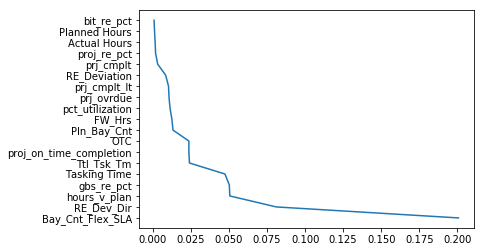

In [228]:
# test the data structure
rs = pd.DataFrame(rsquareds)
rs = rs.sort_values(by = ["R2"], ascending=False)
plt.plot(rs["R2"], rs["Predictor"])

In [210]:
#slice it for each Division
for division in df_full["Division"].unique():
    for predictor in predictors:
        rsq = {}
        x = df_full[df_full[division] == 1][predictor]
        x = sm.add_constant(x)
        y = df_full[df_full[division] == 1]['pct_complete']
        model = sm.OLS(y, x).fit()
        rsq["R2"] = model.rsquared
        rsq["Predictor"] = predictor
        rsq["Subset"] = division
        rsquareds.append(rsq)

In [211]:
#slice it for each Region (ignore syntax)
for division in df_full["Region"].unique():
    for predictor in predictors:
        rsq = {}
        x = df_full[df_full[division] == 1][predictor]
        x = sm.add_constant(x)
        y = df_full[df_full[division] == 1]['pct_complete']
        model = sm.OLS(y, x).fit()
        rsq["R2"] = model.rsquared
        rsq["Predictor"] = predictor
        rsq["Subset"] = division
        rsquareds.append(rsq)

In [212]:
#convert to DF
rs = pd.DataFrame(rsquareds)
rs

,Predictor,R2,Subset
0,RE_Deviation,0.008340,All
1,Bay_Cnt_Flex_SLA,0.200779,All
2,Planned Hours,0.001049,All
3,prj_cmplt_lt,0.010234,All
4,RE_Dev_Dir,0.081104,All
5,OTC,0.023619,All
6,prj_cmplt,0.003119,All
7,Actual Hours,0.001444,All
8,proj_re_pct,0.001724,All
9,Tasking Time,0.047322,All


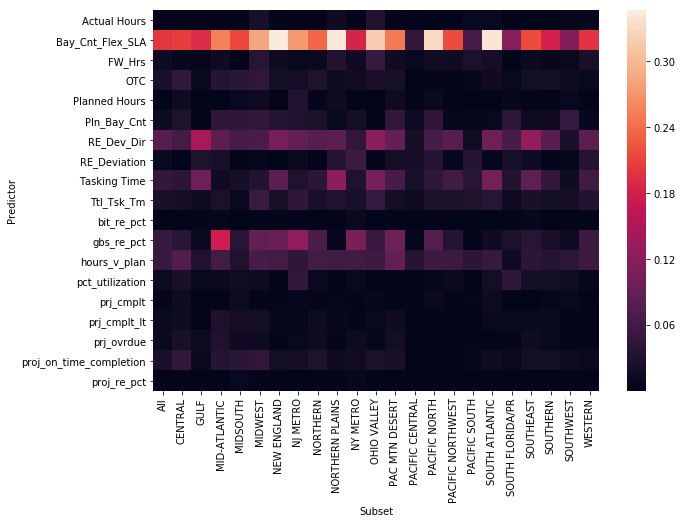

In [226]:
#heatmap plot
fig, ax = plt.subplots(figsize=(10,7)) 
rs2 = rs.pivot("Predictor", "Subset", "R2")
ax = sns.heatmap(rs2)

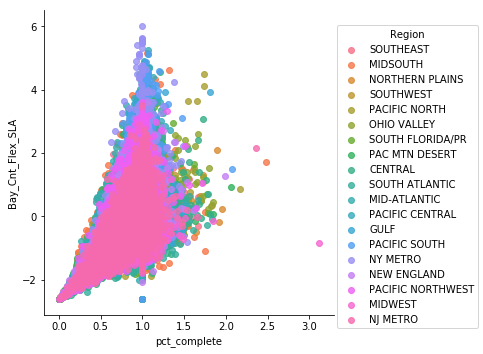

In [230]:
sns.lmplot(x = "pct_complete", y="Bay_Cnt_Flex_SLA", data = df_full, fit_reg=False, hue = "Region")